In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import cartopy.crs as ccrs                   # import projections
import cartopy
import gsw
# import cftime

In [2]:
%matplotlib inline  
#%matplotlib qt5
plt.rcParams['figure.figsize'] = (5,4)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 400
plt.close('all')

__figdir__ = '../plots/' + '_BoB'
savefig_args = {'bbox_inches':'tight', 'pad_inches':0.2}
plotfiletype='png'

# define savefig if we want to use if savefig 
savefig = 1


In [3]:
#specify the grid

#xmin, xmax = (-126,-121)
#ymin, ymax = (36.25,38.5)

In [4]:
file = '../Data/dataset-duacs-nrt(7:10:219).nc'

In [5]:
ds = xr.open_dataset(file)

In [6]:
ds

<xarray.Dataset>
Dimensions:    (time: 1, latitude: 81, longitude: 80)
Coordinates:
  * time       (time) datetime64[ns] 2019-07-10
  * latitude   (latitude) float32 5.125 5.375 5.625 5.875 ... 24.62 24.88 25.12
  * longitude  (longitude) float32 80.12 80.38 80.62 80.88 ... 99.38 99.62 99.88
Data variables:
    ugos       (time, latitude, longitude) float64 ...
    vgos       (time, latitude, longitude) float64 ...
    sla        (time, latitude, longitude) float64 ...
Attributes: (12/45)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    time_coverage_duration:          P1D
    time_coverage_end:               2021-07-13T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2021-07-12T12:00:00Z
    title:                           NRT merged all satellites Global Ocean G...
    History:                         Translated to CF-1.0 Conventions by Netc...

In [ ]:
ds.longitude

In [ ]:
longitude = ds.longitude
latitude = ds.latitude
ugos = ds.ugos
vgos = ds.vgos

In [21]:
#longitude = np.arange(-10, 10, 1)
#latitude = np.arange(-10, 10, 1)

longitude1, latitude1 = np.meshgrid(longitude, latitude)

u, v = np.meshgrid(ugos, vgos)

In [22]:
#longitude = np.transpose(longitude)
#latitude = np.transpose(latitude)

In [23]:
sla = ds.sla

In [ ]:
ds.longitude1


In [ ]:
ax.quiver(longitude1, latitude1, u, v)

In [25]:
sla = ds.sla

In [2]:
timeindex = 0
fig, ax = plt.subplots()
ax.quiver(longitude1, latitude1, u, v)
#ax.quiver(ds.longitude, ds.latitude, scale=3, transform=ccrs.PlateCarree())
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
ax.set_title('BoB SLA')
plt.set_cmap(cmap=plt.get_cmap('nipy_spectral'))
plt.set_cmap(cmap=plt.get_cmap('turbo'))
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.ylabels_right = False
levels = 10
cs = ax.contourf(ds.longitude,ds.latitude,np.squeeze(sla[timeindex ,:,:]), levels, extend='both', transform=ccrs.PlateCarree())
#cs = ax.pcolormesh(ds.longitude,ds.latitude,np.squeeze(ds.sla), vmin=levels[0], vmax=levels[-1], transform=ccrs.PlateCarree())
cb = plt.colorbar(cs,ax=ax,shrink=.8,pad=.05)
#cb = plt.colorbar(cs,fraction = 0.022, extend='both')
cb.set_label('SLA [m]',fontsize = 10)
ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')



NameError: name 'plt' is not defined

IndexError: index 1 is out of bounds for axis 0 with size 1

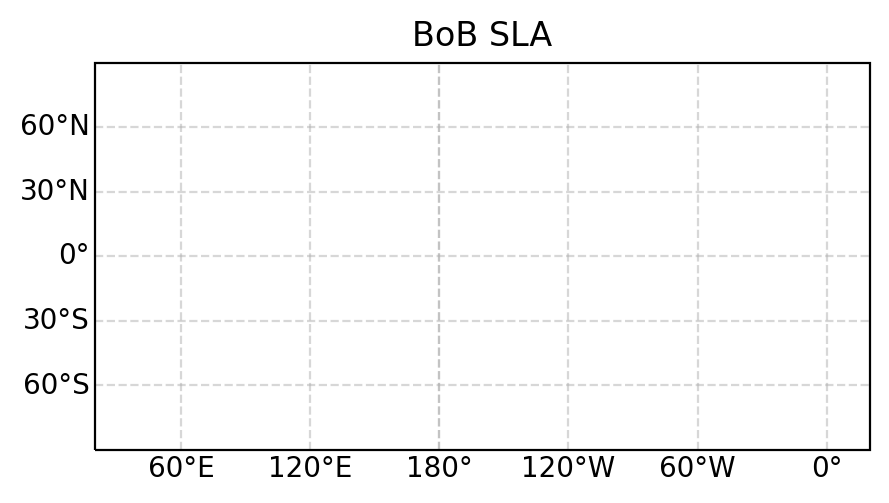

In [21]:
timeindex = 1
ax1 = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
ax1.set_title('BoB SLA')
plt.set_cmap(cmap=plt.get_cmap('nipy_spectral'))
plt.set_cmap(cmap=plt.get_cmap('turbo'))
gl = ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.ylabels_right = False
levels = 10
cs = ax1.contourf(ds.longitude,ds.latitude,np.squeeze(sla[timeindex ,:,:]), levels, extend='both', transform=ccrs.PlateCarree())
#cs = ax.pcolormesh(ds.longitude,ds.latitude,np.squeeze(ds.sla), vmin=levels[0], vmax=levels[-1], transform=ccrs.PlateCarree())
#cb = plt.colorbar(cs,ax=ax,shrink=.8,pad=.05)
cb = plt.colorbar(cs,fraction = 0.022, extend='both')
cb.set_label('SLA [m]',fontsize = 10)
ax1.coastlines()
ax1.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')
